# Aim of the notebook
In this notebook we will process adata and define populations

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define paths

In [3]:
path_to_write='/media/sergio/Meninges/SpatialData_formatted/'

In [4]:
adata=sc.read(path_to_write+'adata_pancreas_raw.h5ad')

In [5]:
adata.layers['spliced']=adata.obsm['spliced']
adata.layers['unspliced']=adata.obsm['unspliced']

In [6]:
del adata.obsm['spliced']
del adata.obsm['unspliced']

In [29]:
adata.obsm['spatial']=np.array(adata.obs.loc[:,['CenterX_global_px','CenterY_global_px']])

# Define populations

In [8]:
adata.layers['raw']=adata.layers['spliced']+adata.layers['unspliced']

In [9]:
adata.X=adata.layers['spliced']+adata.layers['unspliced']

In [12]:
adata

AnnData object with n_obs × n_vars = 47267 × 21731
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'X', 'version', 'Run_name', 'Run_Tissue_name', 'tissue', 'Panel', 'assay_type', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'cell'
    obsm: 'spatial'
    layers: 'spliced', 'unspliced', 'raw'

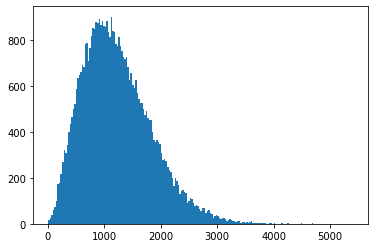

In [13]:
ss=plt.hist(np.sum(adata.X,axis=1),200)

In [15]:
# filter, normalize 
sc.pp.filter_cells(adata,min_counts = 100)
sc.pp.filter_cells(adata,min_genes = 10)
sc.pp.filter_genes(adata,min_cells = 40)

In [17]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
# pca, neighbours, umap, leiden

In [21]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors = 8 , n_pcs=40)

In [22]:
sc.tl.umap(adata,min_dist=0.01)
sc.tl.leiden(adata,resolution = 2.0 )

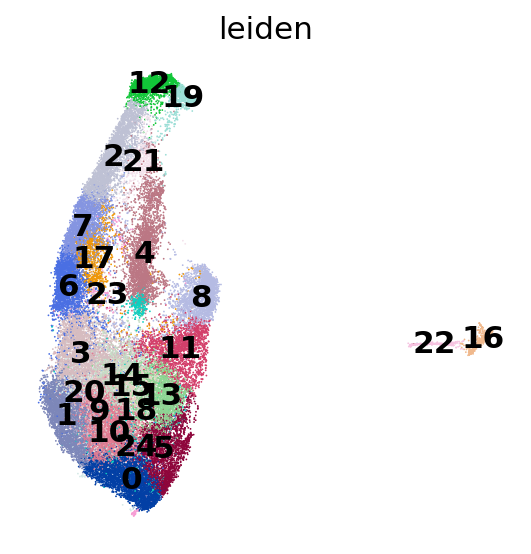

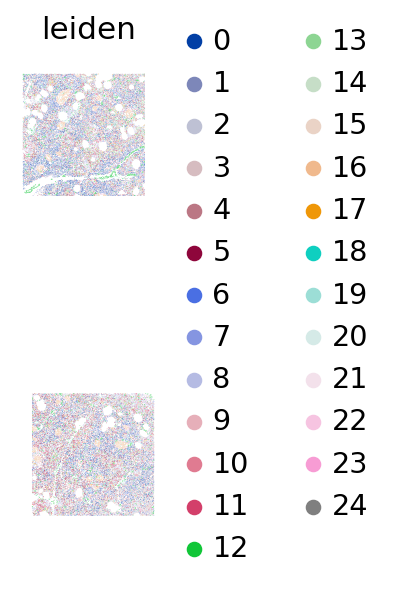

In [44]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, frameon=False, vector_friendly=True, fontsize=14, format='pdf', ipython_format='png2x')
sc.pl.umap(adata,color='leiden',legend_loc='on data')
sc.pl.spatial(adata,color='leiden',spot_size=60)

In [43]:
adata.write(path_to_write+'adata_for_velocity_pancreas_processed.h5ad')

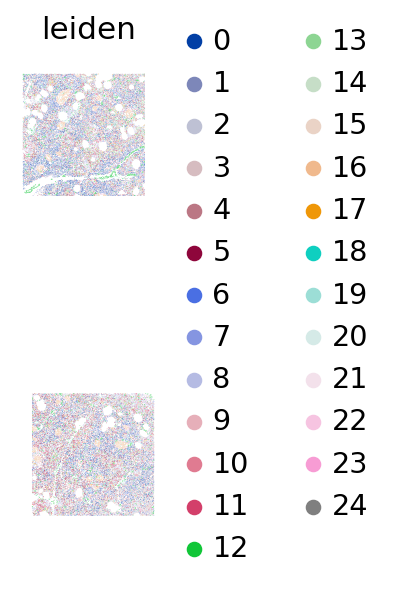

In [31]:
sc.pl.spatial(adata,color='leiden',spot_size=60)

In [25]:
sc.tl.rank_genes_groups(adata,groupby='leiden')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/sergio/anaconda3/envs/xb_dev3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1281434/3858742188.py", line 1, in <module>
    sc.tl.rank_genes_groups(adata,groupby='leiden')
  File "/home/sergio/anaconda3/envs/xb_dev3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py", line 609, in rank_genes_groups
    method, corr_method, n_genes_user, rankby_abs, tie_correct, **kwds
  File "/home/sergio/anaconda3/envs/xb_dev3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py", line 378, in compute_statistics
    for group_index, scores, pvals in generate_test_results:
  File "/home/sergio/anaconda3/envs/xb_dev3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py", line 200, in t_test
    self._basic_stats()
  File "/home/sergio/anaconda3/envs/xb_dev3/lib/python3.7/site-packages/scanpy/tools/_rank_genes

TypeError: object of type 'NoneType' has no len()

# Generate basic plots

In [ ]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, frameon=False, vector_friendly=True, fontsize=14, format='pdf', ipython_format='png2x')
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)


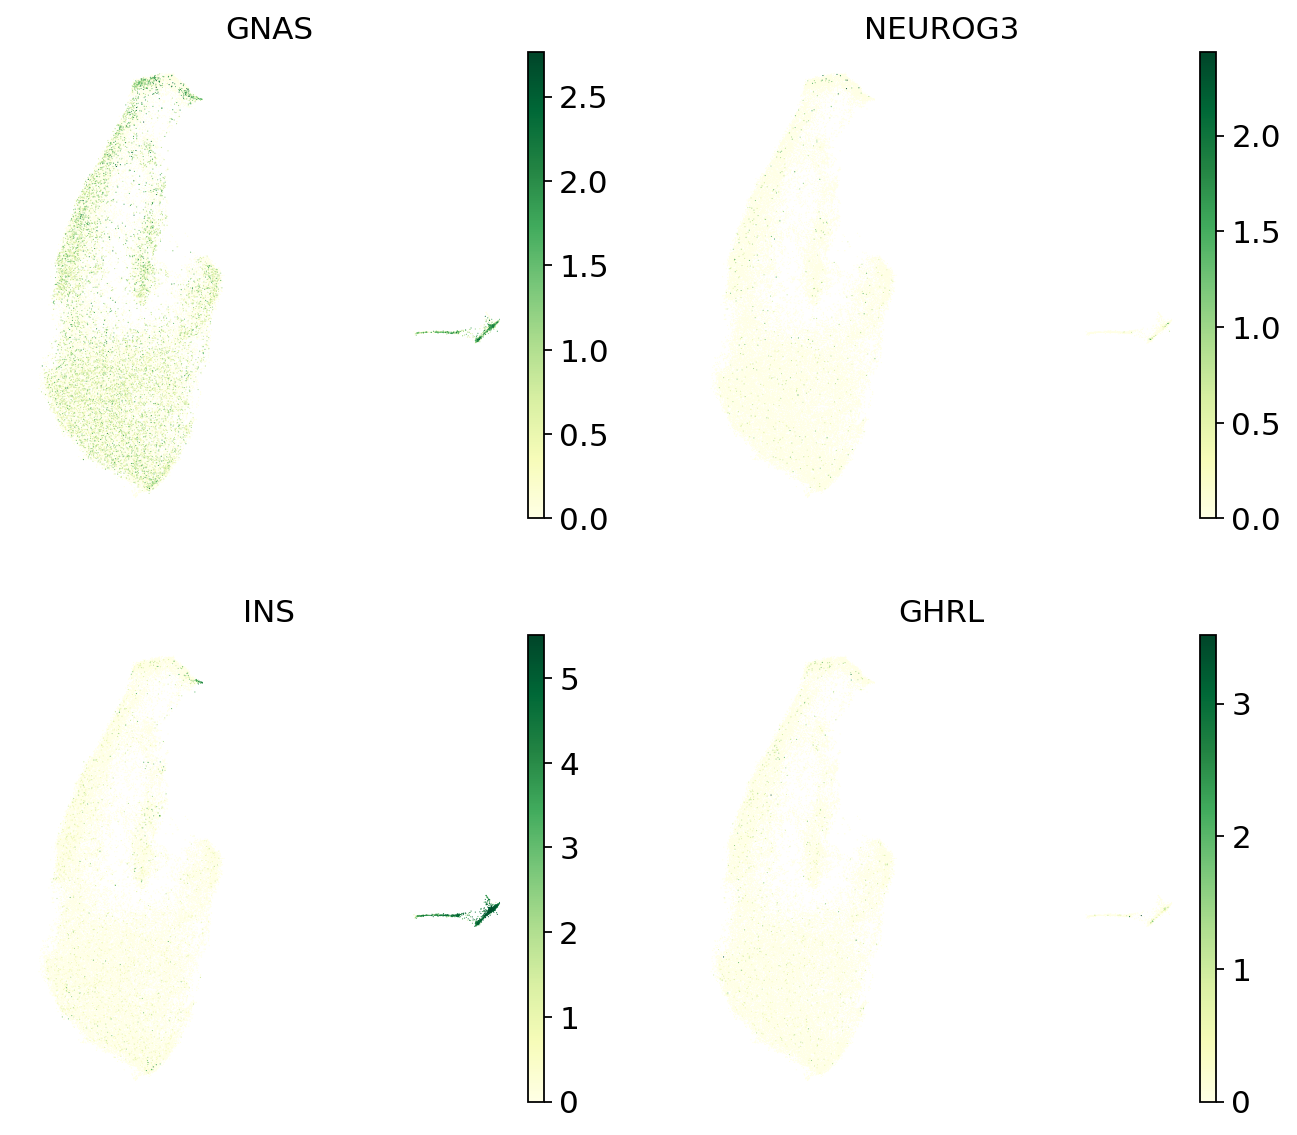

In [42]:
sc.pl.umap(adata,color=['GNAS','NEUROG3','INS','GHRL'],ncols=2,s=1,cmap='YlGn')